2. Implementing Feedforward neural networks with Keras and TensorFlow


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# b. Load the training and testing data (MNIST/CIFAR10)

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


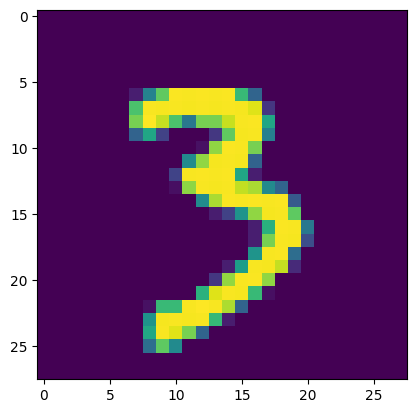

In [4]:
plt.imshow(x_test[30])
plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# c. Define the network architecture using Keras

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for digit classification
])


In [9]:
# d. Train the model using SGD

In [10]:
model.compile(optimizer='sgd',  # Stochastic Gradient Descent optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for classification
              metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=10, batch_size=64)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 1.0333 - accuracy: 0.7205 - val_loss: 0.5172 - val_accuracy: 0.8788
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.5291 - accuracy: 0.8522 - val_loss: 0.3879 - val_accuracy: 0.8992
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4363 - accuracy: 0.8768 - val_loss: 0.3387 - val_accuracy: 0.9105
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3923 - accuracy: 0.8871 - val_loss: 0.3105 - val_accuracy: 0.9150
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3612 - accuracy: 0.8965 - val_loss: 0.2891 - val_accuracy: 0.9202
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9039 - val_loss: 0.2724 - val_accuracy: 0.9253
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3177 - accuracy: 0.9100 - val_loss: 0.2592 - val_accuracy: 0.9284
Epoch 

In [11]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[30]))

313/313 [==============================] - 1s 1ms/step
Handwritten number in the image is= 3


In [12]:
# e. Evaluate the network


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9365
Test accuracy: 0.9365000128746033


In [14]:
# f. Plot the training loss and accuracy

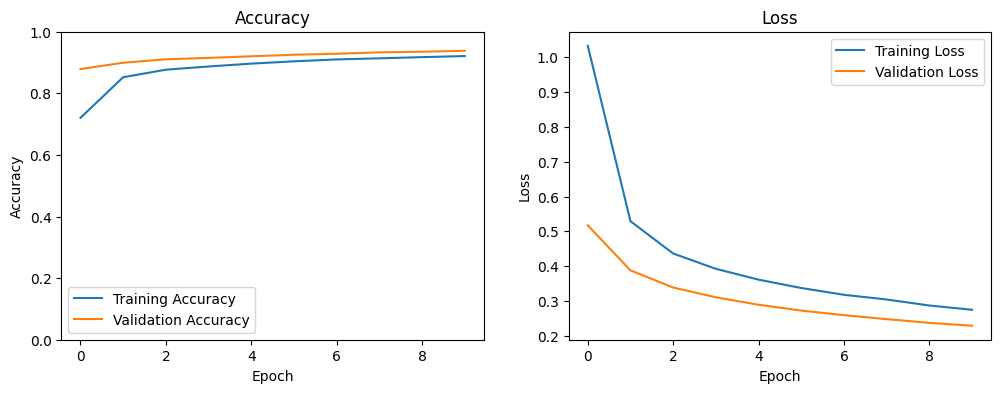

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()
